<a href="https://colab.research.google.com/github/Ignaciojeda/ProyectoCSSCrisDm/blob/main/ModeloLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar nuestros datos y librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/TG_Machine_Learning/datos_datacss.csv'
# Cargar los datos
try:
    data = pd.read_csv(url, sep=",", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datos cargados exitosamente!


# Mostrar las primeras filas para inspección inicial

In [ ]:
print("Vista preliminar de los datos:")
print(data.head())

Vista preliminar de los datos:
          Map       Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0  de_inferno  Terrorist               1        4        1       False   
1  de_inferno  Terrorist               1        4        1       False   
2  de_inferno  Terrorist               1        4        1       False   
3  de_inferno  Terrorist               1        4        1       False   
4  de_inferno  Terrorist               1        4        1       False   

   MatchWinner  Survived  AbnormalMatch  RLethalGrenadesThrown  ...  \
0         True     False          False                      0  ...   
1         True     False          False                      0  ...   
2         True     False          False                      0  ...   
3         True     False          False                      0  ...   
4         True      True          False                      1  ...   

   RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0               0             

# Información sobre tipos de datos y valores nulos

In [ ]:
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          79157 non-null  object 
 1   Team                         79157 non-null  object 
 2   InternalTeamId               79157 non-null  int64  
 3   MatchId                      79157 non-null  int64  
 4   RoundId                      79157 non-null  int64  
 5   RoundWinner                  79157 non-null  object 
 6   MatchWinner                  79157 non-null  bool   
 7   Survived                     79157 non-null  bool   
 8   AbnormalMatch                79157 non-null  bool   
 9   RLethalGrenadesThrown        79157 non-null  int64  
 10  RNonLethalGrenadesThrown     79157 non-null  int64  
 11  PrimaryAssaultRifle          79157 non-null  float64
 12  PrimarySniperRifle           79157 non-null  flo

# Estadísticas descriptivas básicas

In [ ]:
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
       InternalTeamId       MatchId       RoundId  RLethalGrenadesThrown  \
count    79157.000000  79157.000000  79157.000000           79157.000000   
mean         1.500006    250.525033     12.765517               0.498667   
std          0.500003    149.557804      7.432837               0.597985   
min          1.000000      4.000000      1.000000               0.000000   
25%          1.000000    128.000000      6.000000               0.000000   
50%          2.000000    236.000000     12.000000               0.000000   
75%          2.000000    373.000000     19.000000               1.000000   
max          2.000000    511.000000     36.000000               4.000000   

       RNonLethalGrenadesThrown  PrimaryAssaultRifle  PrimarySniperRifle  \
count              79157.000000         79157.000000        79157.000000   
mean                   1.258057             0.675363            0.089840   
std                    1.184909             0.464125       

# Cargamos y preparamos los datos

In [ ]:
X = data[['RoundStartingEquipmentValue', 'RoundId']]  # Variables predictoras
Y = data['TeamStartingEquipmentValue']  # Variable objetivo

In [ ]:
X.columns

Index(['RoundStartingEquipmentValue', 'RoundId'], dtype='object')

# Creamos y ajustamos un modelo

In [ ]:
model = LinearRegression()

model.fit(X, Y)

Y_hat = model.predict(X)

# Evaluamos el desempeño del modelo

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, Y_hat)

14031932.316571046

**En promedio, el error cuadrático entre la predicción y el valor real es bastante alto, lo que puede indicar presencia de algunos errores grandes.**

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y, Y_hat)

2780.5463231257345

**En promedio, el modelo se equivoca por alrededor de $2,780.55 en la predicción del valor de plata.**

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y, Y_hat)

0.8521846747960162

**Un valor de 0.85 indica que el modelo explica el 85.2% de la variabilidad en el valor de plata. Es un buen resultado para un modelo lineal.**

# Graficamos el target esperado contra los resultados del modelo

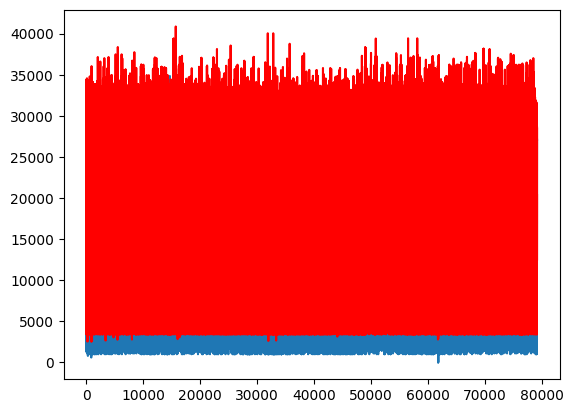

In [ ]:
plt.plot(Y)
plt.plot(Y_hat, 'r')

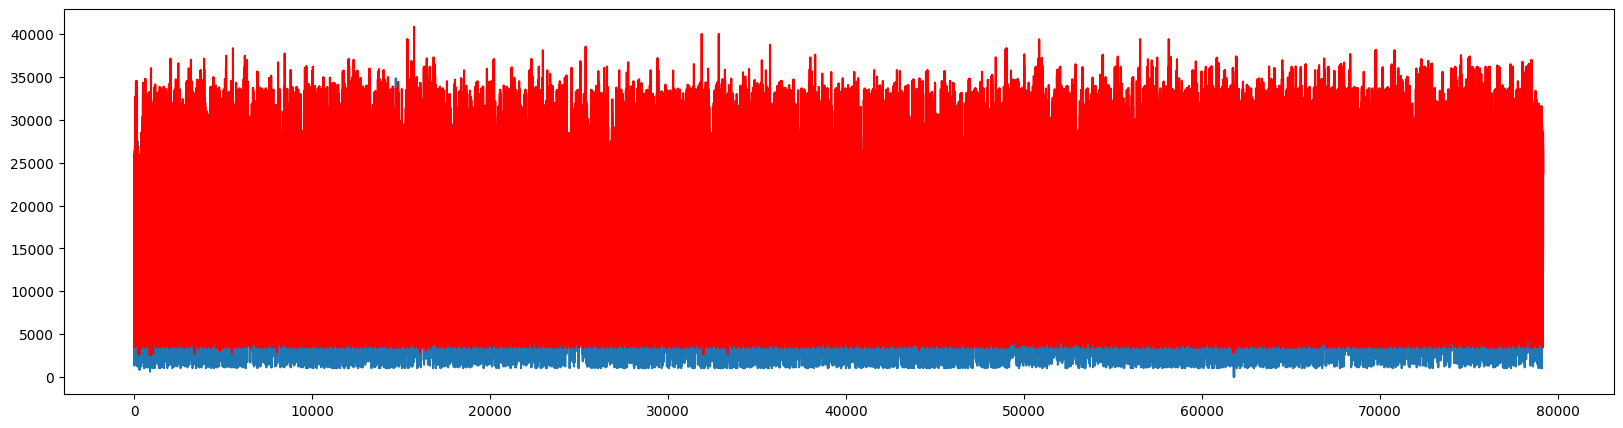

In [ ]:
plt.subplots(figsize=(20,5))
plt.plot(Y)
plt.plot(Y_hat, 'r')

# Implementando la mejora de la validación

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)

(53035, 2)
(26122, 2)


In [ ]:
model = LinearRegression()

model.fit(Xtrain, Ytrain)

Y_hat = model.predict(Xtest)

print(mean_squared_error(Ytest, Y_hat))
print(mean_absolute_error(Ytest, Y_hat))
print(r2_score(Ytest, Y_hat))

13878789.49463092
2766.914461071284
0.8524702169209792


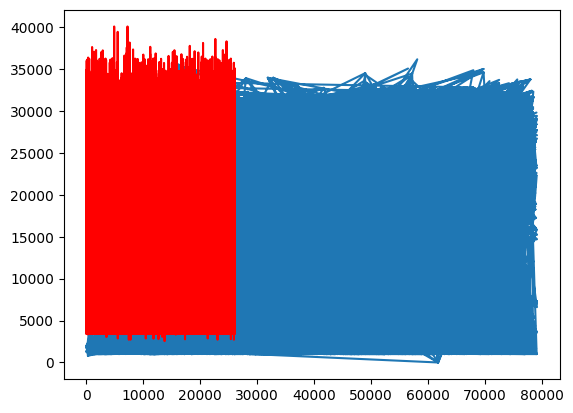

In [ ]:
plt.plot(Ytest)
plt.plot(Y_hat, 'r')

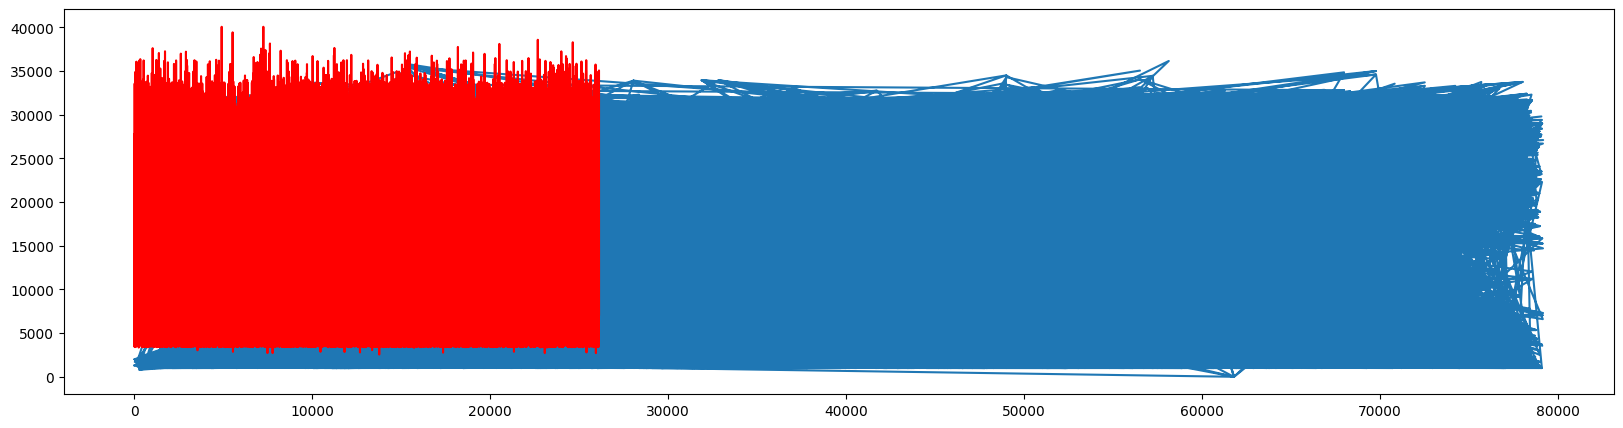

In [ ]:
plt.subplots(figsize=(20,5))
plt.plot(Ytest)
plt.plot(Y_hat, 'r')

#Analisis

 Posibles Problemas:

Subestimación en valores altos:

En el rango superior (ej: valores reales ~40,000), las predicciones (rojo) están por debajo de los valores reales (azul).

Esto sugiere que el modelo no está capturando bien los casos extremos (equipos con valores muy altos).

Sobreestimación en valores bajos:

En algunos puntos iniciales (ej: valores reales ~5,000), las predicciones (rojo) parecen más altas que los reales (azul).

Posibles Outliers:

Hay picos en los valores reales (azul) que el modelo no logra predecir correctamente (ej: alrededor del índice 30,000-40,000).

Relación con las Métricas Anteriores
R² = 0.85: La gráfica respalda que el modelo explica gran parte de la variabilidad, pero falla en valores atípicos o extremos.